In [3]:

import pandas as pd

dataset = 'QM40'
dataset = 'ZINC10M/0'
dataset = 'BACE'

smiles = pd.read_csv(f'data/smiles/{dataset}.csv')

print(smiles.head())

                                              smiles     pIC50  Class
0  O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...  9.154901      1
1  Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...  8.853872      1
2  S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...  8.698970      1
3  S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...  8.698970      1
4  S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...  8.698970      1


In [4]:
from rdkit.Chem import MolFromSmiles
from rdkit import RDLogger

RDLogger.DisableLog('rdApp.*')

all_sizes = []
for smile in smiles['smiles']:
    mol = MolFromSmiles(smile)
    if mol is None:
        continue
    else:
        n_heavy = mol.GetNumHeavyAtoms()
        all_sizes.append(n_heavy)
    if len(all_sizes) > 100000:
        break

In [5]:
n = 0
for size in all_sizes:
    if size > 32:
        n += 1
print(n)

778


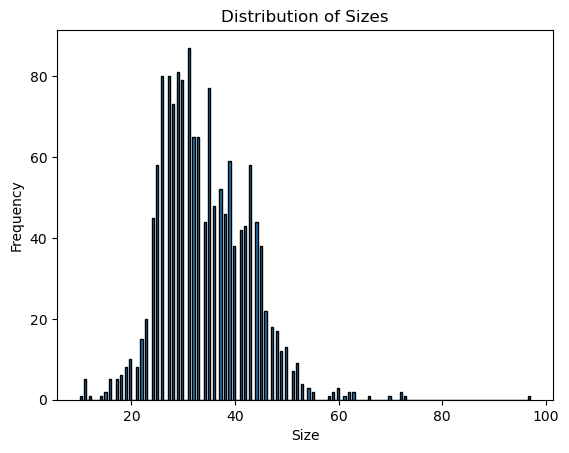

Max size: 97
Min size: 10
Average size: 34.08922670191672


In [6]:
import matplotlib.pyplot as plt

plt.hist(all_sizes, bins=200, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

print('Max size:', max(all_sizes))
print('Min size:', min(all_sizes))
print('Average size:', sum(all_sizes) / len(all_sizes))